In [5]:
from IPython.display import Image

--------------------------
#### An exception 
------------------------------
- is an error that happens during execution of a program. 
- When that error occurs, Python generate an exception that can be handled, which avoids your program to crash.
- Python has many built-in exceptions that are raised when your program encounters an error (something in the program goes wrong).

- When these exceptions occur, the Python interpreter stops the current process and passes it to the calling process until it is handled. If not handled, the program will crash.

    - For example, 
        - let us consider a program where we have a function A that calls function B, which in turn calls function C.
        - If an exception occurs in function C but is not handled in C, the exception passes to B and then to A.

        - If never handled, an error message is displayed and our program comes to a sudden unexpected halt.

##### Exception Errors

- `IOError` - If the file cannot be opened.
- `ImportError` - If python cannot find the module
- `ValueError` - Raised when a built-in operation or function receives an argument that has the right type but an inappropriate value
- `KeyboardInterrupt` - Raised when the user hits the interrupt key (normally Control-C or Delete)
- `EOFError` - Raised when one of the built-in functions (input() or raw_input()) hits an end-of-file condition (EOF) without reading any data

##### Exceptions versus Syntax Errors

- `Syntax errors` occur when the parser detects an incorrect statement. Observe the following example:

In [3]:
 print( 0 / 1 ))

SyntaxError: unmatched ')' (2679040640.py, line 1)

The arrow indicates where the parser ran into the syntax error. In this example, there was one bracket too many. 

In [2]:
print( 0 / 0)

ZeroDivisionError: division by zero

- This time, you ran into an `exception error`. 

- This type of error occurs whenever syntactically correct Python code results in an error. 

- The last line of the message indicated what `type of exception` error you ran into.

- Instead of showing the message `exception error`, Python details what `type of exception error` was encountered. 

    - In this case, it was a `ZeroDivisionError`. 
    
- Python comes with various `built-in exceptions` as well as the possibility to create `self-defined` exceptions.

##### Raising an Exception

- We can use `raise` to throw an exception if a condition occurs.

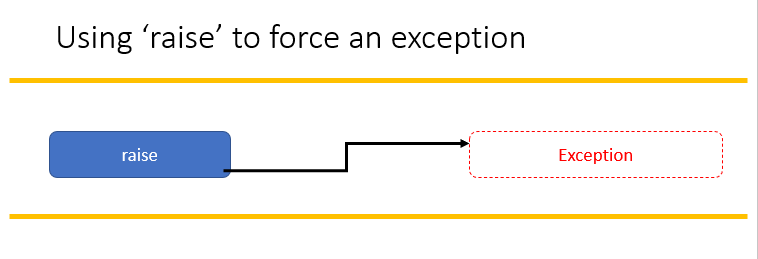

In [23]:
Image('excp-00.PNG', width=800)

In [4]:
x = 10

if x > 5:
    raise Exception('x should not exceed 5. The value of x was: {}'.format(x))

Exception: x should not exceed 5. The value of x was: 10

The program comes to a `halt` and displays our exception to screen, offering clues about what went wrong.

##### The AssertionError Exception
- Instead of waiting for a program to crash midway, you can also start by making an `assertion` in Python. 

- We `assert` that a certain condition is met. 
    - If the `condition turns out to be True`, the program can `continue`. 
    - If the `condition turns out to be False`, you can have the program throw an `AssertionError exception`.

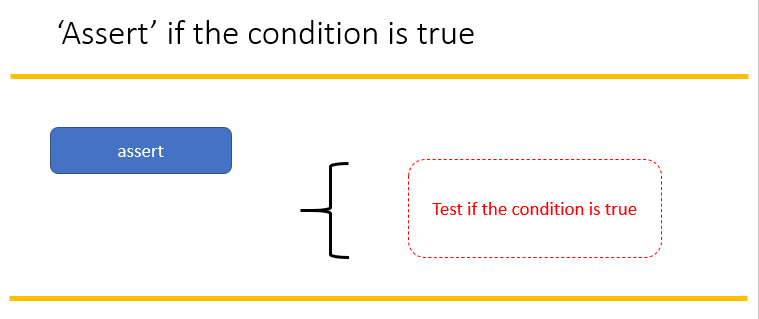

In [6]:
Image('excp-01.PNG', width=800)

In [1]:
import sys

In [2]:
sys.platform

'win32'

In [10]:
assert ('linux' in sys.platform), "This code runs on linux only."

##### The try and except Block: Handling Exceptions

- The `try and except` block in Python is used to `catch and handle` exceptions. 

- Python executes code following the `try` statement as a “normal” part of the program. 

- The code that follows the `except` statement is the program’s response to any exceptions in the preceding try clause.

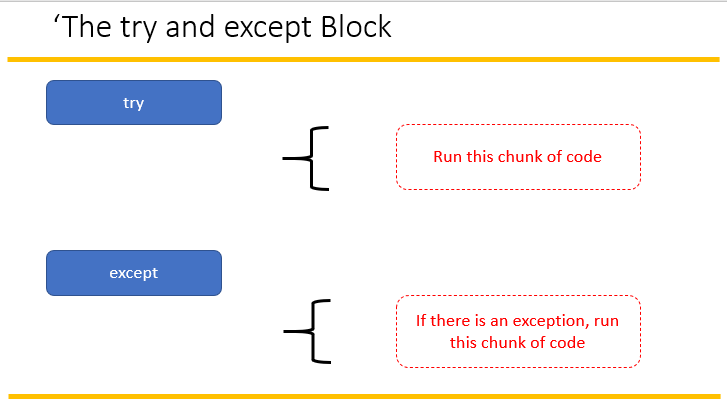

In [29]:
Image('excp-02.PNG', width=800)

In [7]:
# The try and except Block: Handling Exceptions

try:
    pass


except:
    
    
    '''Exception handling'''

##### How does it work?

- The error handling is done through the use of exceptions that are caught in try blocks and handled in except blocks. If an error is encountered, a try block code execution is stopped and transferred down to the except 
block. 

- In addition to using an `except block` after the `try block`, you can also use the `finally block`. 

    - The code in the `finally block` will be executed regardless of whether an exception occurs.

**Example 1:**

In [3]:
def linux_interaction():
    assert ('win32' in sys.platform), "Function can only run on win32 systems."
    print('Doing well...something.')

The linux_interaction() can only run on a Linux system. 

The assert in this function will `throw an AssertionError exception` if you call it on an operating system `other then Linux`.

In [4]:
try:
    linux_interaction()
except:
    print('We are not on Linux, Found some error')

Doing well...something.


In [20]:
try:
    linux_interaction()
except AssertionError as error:
    print(error)
    print('The linux_interaction() function was not executed')

Function can only run on win32 systems.
The linux_interaction() function was not executed


**Example 2:** another example where you open a file and use a built-in exception:

In [21]:
try:
    with open('test1.csv') as file:
        read_data = file.read()
except:
    print('Could not open file.log')

Could not open file.log


In [22]:
try:
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)

[Errno 2] No such file or directory: 'file.log'


**Example 3:** Look at the following code. Here, you first call the linux_interaction() function and then try to open a file:

In [23]:
def linux_interaction():
    assert ('linux' in sys.platform), "Function can only run on Linux systems."
    print('Doing something.')

In [24]:
try:
    linux_interaction()
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)
except AssertionError as error:
    print(error)
    print('Linux linux_interaction() function was not executed')

Doing something.
[Errno 2] No such file or directory: 'file.log'


Inside the `try` clause, you ran into an `exception` immediately and did not get to the part where you attempt to open file.log. 

##### key takeaways:

- A `try` clause is executed up until the point where the first exception is encountered.
- Inside the `except clause`, or the `exception handler`, you determine how the program responds to the exception.
- You can anticipate `multiple exceptions` and differentiate how the program should respond to them.
- `Avoid using bare except clauses`. 

##### The `else` Clause
In Python, using the else statement, you can instruct a program to execute a certain block of code only in the absence of exceptions.

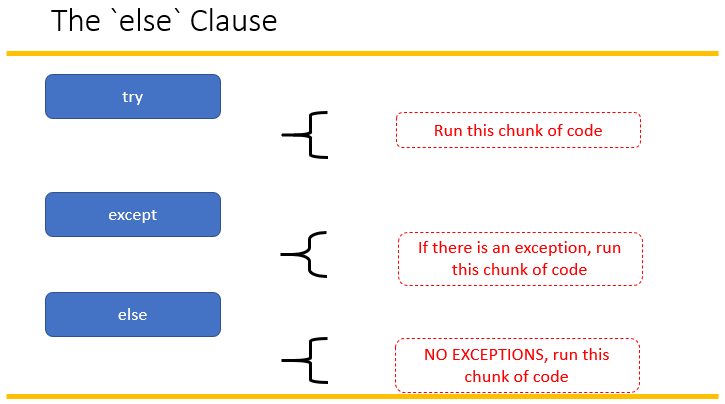

In [30]:
Image('excp-03.PNG', width=800)

In [25]:
def win_interaction():
    assert ('win32' in sys.platform), "Function can only run on Windows systems."
    print('Doing something.')

In [26]:
try:
    win_interaction()
except AssertionError as error:
    print(error)
else:
    print('Executing the else clause.')

Function can only run on Windows systems.


> Because the program did not run into any exceptions, the else clause was executed.

**Example 4:** You can also try to run code inside the else clause and catch possible exceptions there as well:

In [20]:
try:
    win_interaction()
except AssertionError as error:
    print(error)
else:
    try:
        print('Executing the else block ... ')
        with open('file.log') as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)

Doing something.
Executing the else block ... 
[Errno 2] No such file or directory: 'file.log'


##### Using `finally` clause
Imagine that you always had to implement some sort of action to clean up after executing your code. Python enables you to do so using the finally clause.

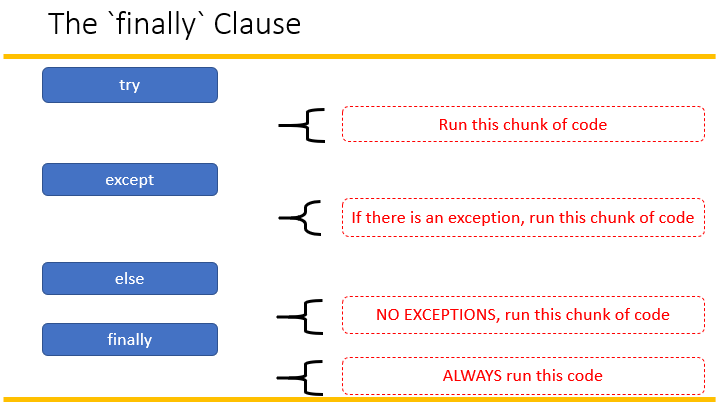

In [36]:
Image('excp-04.PNG', width=800)

In [27]:
try:
    linux_interaction()
except AssertionError as error:
    print(error)
else:
    try:
        with open('file.log') as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)
finally:
    print('Cleaning up, irrespective of any exceptions.')

Doing something.
[Errno 2] No such file or directory: 'file.log'
Cleaning up, irrespective of any exceptions.


##### Examples of built-in exceptions

In [ ]:
# AssertionError	Raised when assert statement fails.
# AttributeError	Raised when attribute assignment or reference fails.
# EOFError	Raised when the input() functions hits end-of-file condition.
# FloatingPointError	Raised when a floating point operation fails.
# GeneratorExit	Raise when a generator's close() method is called.
# ImportError	Raised when the imported module is not found.
# IndexError	Raised when index of a sequence is out of range.
# KeyError	Raised when a key is not found in a dictionary.
# KeyboardInterrupt	Raised when the user hits interrupt key (Ctrl+c or delete).
# MemoryError	Raised when an operation runs out of memory.
# NameError	Raised when a variable is not found in local or global scope.
# NotImplementedError	Raised by abstract methods.
# OSError	Raised when system operation causes system related error.
# OverflowError	Raised when result of an arithmetic operation is too large to be represented.
# ReferenceError	Raised when a weak reference proxy is used to access a garbage collected referent.
# RuntimeError	Raised when an error does not fall under any other category.
# StopIteration	Raised by next() function to indicate that there is no further item to be returned by iterator.
# SyntaxError	Raised by parser when syntax error is encountered.
# IndentationError	Raised when there is incorrect indentation.
# TabError	Raised when indentation consists of inconsistent tabs and spaces.
# SystemError	Raised when interpreter detects internal error.
# SystemExit	Raised by sys.exit() function.
# TypeError	Raised when a function or operation is applied to an object of incorrect type.
# UnboundLocalError	Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable.
# UnicodeError	Raised when a Unicode-related encoding or decoding error occurs.
# UnicodeEncodeError	Raised when a Unicode-related error occurs during encoding.
# UnicodeDecodeError	Raised when a Unicode-related error occurs during decoding.
# UnicodeTranslateError	Raised when a Unicode-related error occurs during translating.
# ValueError	Raised when a function gets argument of correct type but improper value.
# ZeroDivisionError	Raised when second operand of division or modulo operation is zero.

#### Summarize

In [29]:
try:
    num1 = int(input("Enter a number: "))
    num2 = int(input("Enter another number: "))
    result = num1 / num2
    print("Result:", result)
except ZeroDivisionError:
    print("Error: Cannot divide by zero.")
except ValueError:
    print("Error: Invalid input. Please enter valid numbers.")


Enter a number:  9
Enter another number:  jjj


Error: Invalid input. Please enter valid numbers.


In [30]:
try:
    file_path = input("Enter the file path: ")
    with open(file_path, 'r') as file:
        data = file.read()
    print("File content:", data)
except FileNotFoundError:
    print("Error: The specified file does not exist.")
except PermissionError:
    print("Error: Permission denied. You don't have access to this file.")
except Exception as e:
    print("Error:", e)


Enter the file path:  78


Error: The specified file does not exist.


In [4]:
try:
    num = int(input("Enter a number: "))
    result = 10 / num
    print("Result:", result)
except ZeroDivisionError:
    print("Error: Cannot divide by zero.")
finally:
    print("This block will always execute.")


Enter a number:  12


Result: 0.8333333333333334
This block will always execute.


In [5]:
def calculate_square_root(num):
    if num < 0:
        raise ValueError("Cannot calculate square root of a negative number.")
    return num ** 0.5

try:
    num = float(input("Enter a number: "))
    result = calculate_square_root(num)
    print("Square root:", result)
except ValueError as ve:
    print("Error:", ve)


Enter a number:  23


Square root: 4.795831523312719
